<a href="https://colab.research.google.com/github/VeronicaHeringer/Curso_PyGeo/blob/main/RESOLUCAO_EXERC_M04_PYGEO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Instalações necessárias para esse exercício
!apt update -q
!apt upgrade -q
!apt install gdal-bin python-gdal python3-gdal -q
!apt install python3-rtree -q
!pip install geopandas==0.14.4
!pip install descartes -q
!pip install numpy==1.24.0

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [3,081 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [4,126 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd

Execício M4 - Trabalhando com dados OSM, análise de vizinhança e reclassificação de dados

Agora vamos praticar e expandir o que aprendemos no módulo M4 - Trabalhando com dados OSM, análise de vizinhança e reclassificação de dados.

O objetivo geral é definir áreas de dominância para 8 shopping centers em Helsinque com diferentes modos de viagem (transporte público, carro particular). O último passo é descobrir quantas pessoas vivem nas áreas de domínio desses grandes shopping centers na região de Helsinque.



E1- Combinando dados de acessibilidade em um grid e criando visualizações

Acesse aqui um conjunto de dados que inclui 7 arquivos de texto contendo dados sobre acessibilidade na região de Helsinki e um Shapefile que contém uma grade de polígonos que pode ser usada para visualizar e analisar os dados espacialmente.

Os conjuntos de dados são:

travel_times_to_ [XXXXXXX] _ [NOME DO SHOPPING] .txt incluindo tempos de viagem e distâncias da rede rodoviária até um shopping center específico

MetropAccess_YKR_grid_EurefFIN.shp incluindo a grade Polygon com coluna YKR_ID que pode ser usada para unir a grade com os dados de acessibilidade

a) Leia esses arquivos de dados travel_time (um por um) com a Pandas e selecione apenas as seguintes colunas :

pt_r_tt - tempo transporte público
car_r_t - tempo de carro
from_id - id da célula de origem
to_id - id da célula de destino



In [1]:
#a) Leia esses arquivos de dados travel_time (um por um) com a Pandas
# Fazer a conexão pra acessar o Google Drive

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# Indicar o caminho da pasta onde estão os dados
caminho="/content/drive/MyDrive/Colab Notebooks/MATERIAL_CURSO_DRIVE/M4/M4/E4"



In [3]:
# Importar a biblio operation system (os) pra manipular caminhos de arquivos

import os

In [4]:
# Criar uma lista vazia

dados=[]

In [5]:
# Criar um loop de for para realizar a leitura de todos os arquivos na pasta

for arquivo in os.listdir(caminho):
  if arquivo.startswith("TravelTimes_to"):
    dados.append(arquivo)

dados

['TravelTimes_to_5878070_Jumbo.txt',
 'TravelTimes_to_5878087_Dixi.txt',
 'TravelTimes_to_5902043_Myyrmanni.txt',
 'TravelTimes_to_5944003_Itis.txt',
 'TravelTimes_to_5975373_Forum.txt',
 'TravelTimes_to_5978593_Iso_omena.txt',
 'TravelTimes_to_5980260_Ruoholahti.txt']

In [6]:
# Alterar o diretório onde serão salvos os arquivos

os.chdir(caminho)

In [7]:
# Realizar a leitura dos arquivos com a pandas.
import pandas as pd


# Lendo o primeiro item da lista [0]

Jumbo=pd.read_csv(dados[0], sep=";")
Jumbo.head()

,from_id,to_id,walk_t,walk_d,car_r_t,car_r_d,car_m_t,car_m_d,pt_r_t,pt_r_tt,pt_r_d,pt_m_t,pt_m_tt,pt_m_d
0,5785640,5878070,318,22279,39,23233,34,23233,101,131,24276,106,138,22627
1,5785641,5878070,281,19662,39,23444,34,23444,108,129,26134,109,137,22833
2,5785642,5878070,282,19742,45,17666,41,17666,109,129,26251,111,137,22951
3,5785643,5878070,286,20034,46,24695,40,24698,114,138,26544,115,141,23244
4,5787544,5878070,311,21789,38,22807,33,22807,98,115,25438,90,113,22138


In [8]:
# Selecionar apenas as colunas de interesse
Jumbo=Jumbo[["pt_r_tt", "car_r_t", "from_id", "to_id"]]
Jumbo.head()

,pt_r_tt,car_r_t,from_id,to_id
0,131,39,5785640,5878070
1,129,39,5785641,5878070
2,129,45,5785642,5878070
3,138,46,5785643,5878070
4,115,38,5787544,5878070


In [9]:
# Lendo o segundo item da lista [1]

Dixi=pd.read_csv(dados[1], sep=";")
Dixi.head()

,from_id,to_id,walk_t,walk_d,car_r_t,car_r_d,car_m_t,car_m_d,pt_r_t,pt_r_tt,pt_r_d,pt_m_t,pt_m_tt,pt_m_d
0,5785640,5878087,350,24513,45,27882,40,27890,102,134,27566,114,145,30241
1,5785641,5878087,321,22438,45,28093,40,28100,109,130,30447,117,143,30447
2,5785642,5878087,322,22518,52,22575,46,22583,111,130,30564,119,144,30564
3,5785643,5878087,326,22811,48,23991,41,23992,115,140,30857,123,148,30857
4,5787544,5878087,343,24024,44,27456,39,27464,99,118,29751,98,121,27077


In [10]:
# Selecionar apenas as colunas de interesse
Dixi=Dixi[["pt_r_tt", "car_r_t", "from_id", "to_id"]]
Dixi.head()

,pt_r_tt,car_r_t,from_id,to_id
0,134,45,5785640,5878087
1,130,45,5785641,5878087
2,130,52,5785642,5878087
3,140,48,5785643,5878087
4,118,44,5787544,5878087


In [11]:
# Lendo o terceiro item da lista [2]

Myyrmanni=pd.read_csv(dados[2], sep=";")
Myyrmanni.head()

,from_id,to_id,walk_t,walk_d,car_r_t,car_r_d,car_m_t,car_m_d,pt_r_t,pt_r_tt,pt_r_d,pt_m_t,pt_m_tt,pt_m_d
0,5785640,5902043,295,20668,39,22321,35,22321,90,121,21119,98,129,21119
1,5785641,5902043,258,18052,39,22532,35,22532,93,115,21325,101,127,21325
2,5785642,5902043,259,18131,47,22216,42,20440,95,115,21443,103,128,21443
3,5785643,5902043,263,18424,51,24773,46,22996,99,126,21736,107,132,21736
4,5787544,5902043,288,20179,38,21895,34,21895,83,103,20630,91,108,20630


In [12]:
# Selecionar apenas as colunas de interesse
Myyrmanni=Myyrmanni[["pt_r_tt", "car_r_t", "from_id", "to_id"]]
Myyrmanni.head()

,pt_r_tt,car_r_t,from_id,to_id
0,121,39,5785640,5902043
1,115,39,5785641,5902043
2,115,47,5785642,5902043
3,126,51,5785643,5902043
4,103,38,5787544,5902043


In [13]:
# Lendo o quarto item da lista [3]

Itis=pd.read_csv(dados[3], sep=";")
Itis.head()

,from_id,to_id,walk_t,walk_d,car_r_t,car_r_d,car_m_t,car_m_d,pt_r_t,pt_r_tt,pt_r_d,pt_m_t,pt_m_tt,pt_m_d
0,5785640,5944003,494,34582,50,36229,44,36229,132,157,38465,142,173,38465
1,5785641,5944003,457,31966,51,36439,45,36439,135,154,38671,145,171,38671
2,5785642,5944003,458,32046,58,35841,52,34064,137,154,38789,147,172,38789
3,5785643,5944003,462,32338,57,37723,50,37935,141,163,39082,151,176,39082
4,5787544,5944003,487,34093,50,35803,44,35803,125,142,37976,122,148,37786


In [14]:
# Selecionar apenas as colunas de interesse
Itis=Itis[["pt_r_tt", "car_r_t", "from_id", "to_id"]]
Itis.head()

,pt_r_tt,car_r_t,from_id,to_id
0,157,50,5785640,5944003
1,154,51,5785641,5944003
2,154,58,5785642,5944003
3,163,57,5785643,5944003
4,142,50,5787544,5944003


In [15]:
# Lendo o quinto item da lista [4]

Forum=pd.read_csv(dados[4], sep=";")
Forum.head()

,from_id,to_id,walk_t,walk_d,car_r_t,car_r_d,car_m_t,car_m_d,pt_r_t,pt_r_tt,pt_r_d,pt_m_t,pt_m_tt,pt_m_d
0,5785640,5975373,456,31918,49,31947,44,31985,110,137,32758,118,149,32758
1,5785641,5975373,419,29302,49,32158,44,32196,113,134,32964,121,147,32964
2,5785642,5975373,420,29381,57,31560,51,29821,115,134,33082,123,148,33082
3,5785643,5975373,424,29674,60,34116,55,32377,119,144,33375,127,152,33375
4,5787544,5975373,449,31429,48,31522,43,31559,103,121,32269,111,128,32269


In [16]:
# Selecionar apenas as colunas de interesse
Forum=Forum[["pt_r_tt", "car_r_t", "from_id", "to_id"]]
Forum.head()

,pt_r_tt,car_r_t,from_id,to_id
0,137,49,5785640,5975373
1,134,49,5785641,5975373
2,134,57,5785642,5975373
3,144,60,5785643,5975373
4,121,48,5787544,5975373


In [17]:
# Lendo o sexto item da lista [5]

Iso_omena=pd.read_csv(dados[5], sep=";")
Iso_omena.head()

,from_id,to_id,walk_t,walk_d,car_r_t,car_r_d,car_m_t,car_m_d,pt_r_t,pt_r_tt,pt_r_d,pt_m_t,pt_m_tt,pt_m_d
0,5785640,5978593,490,34268,56,41625,49,41625,141,166,44625,149,176,44624
1,5785641,5978593,469,32858,56,41836,49,41836,143,164,44831,151,176,44830
2,5785642,5978593,471,32937,64,41238,56,39461,145,164,44948,153,178,44947
3,5785643,5978593,475,33230,67,43794,60,42018,149,174,45242,157,182,45240
4,5787544,5978593,483,33778,55,41200,48,41200,134,150,44136,142,158,44134


In [18]:
# Selecionar apenas as colunas de interesse
Iso_omena=Iso_omena[["pt_r_tt", "car_r_t", "from_id", "to_id"]]
Iso_omena.head()

,pt_r_tt,car_r_t,from_id,to_id
0,166,56,5785640,5978593
1,164,56,5785641,5978593
2,164,64,5785642,5978593
3,174,67,5785643,5978593
4,150,55,5787544,5978593


In [19]:
# Lendo o setimo item da lista [6] e último [-1]

Ruoholahti=pd.read_csv(dados[6], sep=";")
Ruoholahti.head()

,from_id,to_id,walk_t,walk_d,car_r_t,car_r_d,car_m_t,car_m_d,pt_r_t,pt_r_tt,pt_r_d,pt_m_t,pt_m_tt,pt_m_d
0,5785640,5980260,468,32784,56,33768,49,33805,118,147,34474,125,156,34474
1,5785641,5980260,431,30168,56,33979,49,34016,121,142,34680,128,155,34680
2,5785642,5980260,432,30247,63,33380,56,31641,123,142,34797,130,156,34797
3,5785643,5980260,436,30540,67,35937,60,34198,127,153,35090,134,160,35090
4,5787544,5980260,461,32295,55,33342,48,33380,111,130,33984,118,135,33984


In [20]:
# Selecionar apenas as colunas de interesse
Ruoholahti=Ruoholahti[["pt_r_tt", "car_r_t", "from_id", "to_id"]]
Ruoholahti.head()

,pt_r_tt,car_r_t,from_id,to_id
0,147,56,5785640,5980260
1,142,56,5785641,5980260
2,142,63,5785642,5980260
3,153,67,5785643,5980260
4,130,55,5787544,5980260


b) Visualize os tempos de viagem classificados (Transporte público e carro) de pelo menos um dos shoppings usando os métodos de classificação que aprendemos na aula.

In [21]:
import geopandas as gpd

grid=gpd.read_file("/content/drive/MyDrive/Colab Notebooks/MATERIAL_CURSO_DRIVE/M4/M4/E4/MetropAccess_YKR_grid_EurefFIN.shp")
grid.head()


,x,y,YKR_ID,geometry
0,381875.0,6697880.0,5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6..."
1,382125.0,6697880.0,5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6..."
2,382375.0,6697880.0,5785642,"POLYGON ((382500.000 6697750.000, 382250.000 6..."
3,382625.0,6697880.0,5785643,"POLYGON ((382750.000 6697750.000, 382500.000 6..."
4,381125.0,6697630.0,5787544,"POLYGON ((381250.000 6697500.000, 381000.000 6..."


In [22]:
# Juntar a tabela (txt) com a tabela do shape do metro

tt_Ruoholahti=grid.merge(Ruoholahti, right_on="from_id", left_on="YKR_ID", how="inner")
tt_Ruoholahti.head()

,x,y,YKR_ID,geometry,pt_r_tt,car_r_t,from_id,to_id
0,381875.0,6697880.0,5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6...",147,56,5785640,5980260
1,382125.0,6697880.0,5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6...",142,56,5785641,5980260
2,382375.0,6697880.0,5785642,"POLYGON ((382500.000 6697750.000, 382250.000 6...",142,63,5785642,5980260
3,382625.0,6697880.0,5785643,"POLYGON ((382750.000 6697750.000, 382500.000 6...",153,67,5785643,5980260
4,381125.0,6697630.0,5787544,"POLYGON ((381250.000 6697500.000, 381000.000 6...",130,55,5787544,5980260


In [23]:
# Selecionar apenas os valores válidos (>0

tt_Ruoholahti=tt_Ruoholahti[tt_Ruoholahti["pt_r_tt"]>0]
tt_Ruoholahti.head()

,x,y,YKR_ID,geometry,pt_r_tt,car_r_t,from_id,to_id
0,381875.0,6697880.0,5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6...",147,56,5785640,5980260
1,382125.0,6697880.0,5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6...",142,56,5785641,5980260
2,382375.0,6697880.0,5785642,"POLYGON ((382500.000 6697750.000, 382250.000 6...",142,63,5785642,5980260
3,382625.0,6697880.0,5785643,"POLYGON ((382750.000 6697750.000, 382500.000 6...",153,67,5785643,5980260
4,381125.0,6697630.0,5787544,"POLYGON ((381250.000 6697500.000, 381000.000 6...",130,55,5787544,5980260


In [24]:
# Instalar a biblio mapclassify

!pip install mapclassify==2.4.3 -q
import mapclassify

In [25]:
# Importar a matplotlib

import matplotlib.pyplot as plt

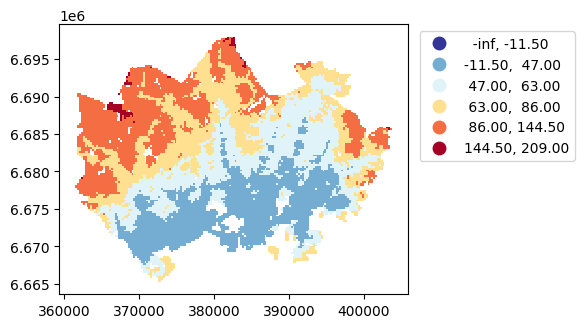

In [26]:
# Plotar os dados (a pé)
tt_Ruoholahti.plot(column="pt_r_tt", scheme='BoxPlot', k=5, cmap='RdYlBu_r', linewidth=0, legend=True, legend_kwds={'bbox_to_anchor':(1.5, 1.0)})
plt.tight_layout()


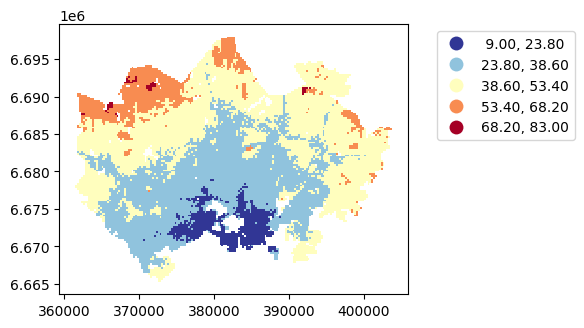

In [27]:
# Plotar os dados de carro

tt_Ruoholahti.plot(column="car_r_t", scheme='EqualInterval', k=5, cmap='RdYlBu_r', linewidth=0, legend=True, legend_kwds={'bbox_to_anchor':(1.5, 1.0)})
plt.tight_layout()

E2- Calcule e visualize as áreas de influência de cada shopping

O objetivo é definir a área de influência para cada um desses shopping centers com base no tempo de viagem de carro.

a) Itere sobre os arquivos de acessibilidade um por um e renomeie as colunas de tempo de viagem para que possam ser identificadas para cada shopping

b) Junte essas as colunas que indicam o tempo de viagem para cada shopping ao shapefile em MetropAccess_YKR_grid_EurefFIN.shp onde YKR_ID na grade corresponde a from_id no arquivo de dados de tempo de viagem. No final você deve ter um GeoDataFrame com diferentes colunas mostrando os tempos de viagem para diferentes shopping centers.



In [28]:
# Expressão para selecionar apenas o nome do shopping, quebrando o nome do arquivo

import re
print(re.findall(r'[0-9]\_(.*?)\.', dados [1])[0])

Dixi


In [29]:
tt_all=grid
pe_labs=[]
car_labs=[]

for arquivo in dados:
  tv=pd.read_csv(arquivo, sep=";")
  tv=tv[tv["pt_r_tt"]>0]
  shopping=re.findall(r'[0-9]\_(.*?)\.', arquivo)[0]
  car_lab='%s_car'%(shopping)
  pe_lab='%s_andando'%(shopping)
  tv=tv.rename(columns={'car_r_t':car_lab, 'pt_r_tt':pe_lab})
  pe_labs.append(pe_lab)
  car_labs.append(car_lab)
  tv=tv[[car_lab, pe_lab, 'from_id']]
  tt_all=tt_all.merge(tv, right_on="from_id", left_on="YKR_ID", how="inner", suffixes=('', '_dup'))




In [30]:
tt_all.head()

,x,y,YKR_ID,geometry,Jumbo_car,Jumbo_andando,from_id,Dixi_car,Dixi_andando,from_id_dup,...,from_id_dup,Forum_car,Forum_andando,from_id_dup,Iso_omena_car,Iso_omena_andando,from_id_dup,Ruoholahti_car,Ruoholahti_andando,from_id_dup
0,381875.0,6697880.0,5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6...",39,131,5785640,45,134,5785640,...,5785640,49,137,5785640,56,166,5785640,56,147,5785640
1,382125.0,6697880.0,5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6...",39,129,5785641,45,130,5785641,...,5785641,49,134,5785641,56,164,5785641,56,142,5785641
2,382375.0,6697880.0,5785642,"POLYGON ((382500.000 6697750.000, 382250.000 6...",45,129,5785642,52,130,5785642,...,5785642,57,134,5785642,64,164,5785642,63,142,5785642
3,382625.0,6697880.0,5785643,"POLYGON ((382750.000 6697750.000, 382500.000 6...",46,138,5785643,48,140,5785643,...,5785643,60,144,5785643,67,174,5785643,67,153,5785643
4,381125.0,6697630.0,5787544,"POLYGON ((381250.000 6697500.000, 381000.000 6...",38,115,5787544,44,118,5787544,...,5787544,48,121,5787544,55,150,5787544,55,130,5787544


c) Para cada linha descubra o valor mínimo de todas as colunas XXX_car_r_tt e insira esse valor em uma nova coluna chamada min_car.

d) Para cada linha descubra o nome do shopping mais próximo e insira esse valor em uma nova coluna chamada influência.

In [31]:
tt_all['min_car']=None
tt_all['influencia']=None

for index,row in tt_all.iterrows():
    tt_all.loc[index,'min_car']= (row[car_labs].min())
    df=(pd.DataFrame(row[car_labs],))
    df.rename(columns={ df.columns[0]: "tempo" }, inplace = True)
    tt_all.loc[index,'influencia']=(str.split(df.index[df.tempo==df.tempo.min()][0], '_car'))[0]

In [32]:
tt_all.head()

,x,y,YKR_ID,geometry,Jumbo_car,Jumbo_andando,from_id,Dixi_car,Dixi_andando,from_id_dup,...,Forum_andando,from_id_dup,Iso_omena_car,Iso_omena_andando,from_id_dup,Ruoholahti_car,Ruoholahti_andando,from_id_dup,min_car,influencia
0,381875.0,6697880.0,5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6...",39,131,5785640,45,134,5785640,...,137,5785640,56,166,5785640,56,147,5785640,39,Jumbo
1,382125.0,6697880.0,5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6...",39,129,5785641,45,130,5785641,...,134,5785641,56,164,5785641,56,142,5785641,39,Jumbo
2,382375.0,6697880.0,5785642,"POLYGON ((382500.000 6697750.000, 382250.000 6...",45,129,5785642,52,130,5785642,...,134,5785642,64,164,5785642,63,142,5785642,45,Jumbo
3,382625.0,6697880.0,5785643,"POLYGON ((382750.000 6697750.000, 382500.000 6...",46,138,5785643,48,140,5785643,...,144,5785643,67,174,5785643,67,153,5785643,46,Jumbo
4,381125.0,6697630.0,5787544,"POLYGON ((381250.000 6697500.000, 381000.000 6...",38,115,5787544,44,118,5787544,...,121,5787544,55,150,5787544,55,130,5787544,38,Jumbo




e) Visualize os tempos de viagem da nossa coluna min_car usando um classificador



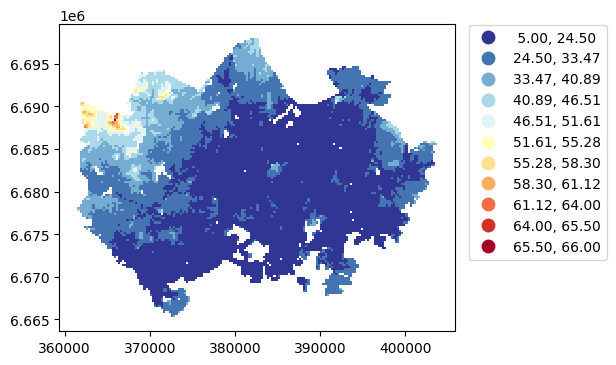

In [33]:
# Use a função  .plot da geopandas e especifique a coluna min_car
tt_all.plot(column="min_car", scheme="HeadTailBreaks", cmap="RdYlBu_r", linewidth=0, legend=True, legend_kwds={'bbox_to_anchor': (1.10, 0.82, 0.3, 0.2)})
plt.tight_layout()

f) Visualize também os valores na coluna influência

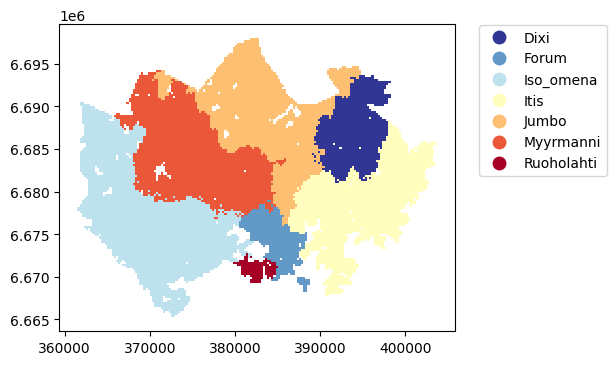

In [34]:
# Use a função  .plot da geopandas e especifique a coluna influencia
tt_all.plot(column="influencia", cmap="RdYlBu_r", linewidth=0, legend=True, legend_kwds={'bbox_to_anchor': (1.10, 0.82, 0.3, 0.2)})
plt.tight_layout()

E3 - Quantas pessoas vivem na área de influência de cada shopping

Os dados de população estão no shapefile Vaestotietoruudukko_2020.shp, a coluna asukaita indica a população.

a) Leia os dados de população



In [35]:
# Lendo os dados com a geopandas

pop=gpd.read_file("/content/drive/MyDrive/Colab Notebooks/MATERIAL_CURSO_DRIVE/M4/M4/E4/Vaestotietoruudukko_2020.shp")
pop.head()

,INDEX,ASUKKAITA,ASVALJYYS,IKA0_9,IKA10_19,IKA20_29,IKA30_39,IKA40_49,IKA50_59,IKA60_69,IKA70_79,IKA_YLI80,geometry
0,703,5,51.0,99,99,99,99,99,99,99,99,99,"POLYGON ((25472499.995 6685998.998, 25472499.9..."
1,710,8,44.0,99,99,99,99,99,99,99,99,99,"POLYGON ((25472499.995 6684249.004, 25472499.9..."
2,711,5,90.0,99,99,99,99,99,99,99,99,99,"POLYGON ((25472499.995 6683999.005, 25472499.9..."
3,715,13,34.0,99,99,99,99,99,99,99,99,99,"POLYGON ((25472499.995 6682998.998, 25472499.9..."
4,848,5,53.0,99,99,99,99,99,99,99,99,99,"POLYGON ((25472749.993 6690249.003, 25472749.9..."


b) Agregue as áreas de influência em geometrias unificadas usando a função dissolve()



In [36]:
area_influ=tt_all.dissolve(by='influencia')
print(area_influ.shape)

(7, 26)


In [37]:
area_influ.head()

,geometry,x,y,YKR_ID,Jumbo_car,Jumbo_andando,from_id,Dixi_car,Dixi_andando,from_id_dup,...,Forum_car,Forum_andando,from_id_dup,Iso_omena_car,Iso_omena_andando,from_id_dup,Ruoholahti_car,Ruoholahti_andando,from_id_dup,min_car
influencia,,,,,,,,,,,,,,,,,,,,,
Dixi,"MULTIPOLYGON (((390000.000 6683500.000, 390000...",394625.0,6693630.0,5818066,31,65,5818066,30,43,5818066,...,46,65,5818066,55,94,5818066,51,72,5818066,30
Forum,"MULTIPOLYGON (((381250.000 6675500.000, 381000...",383875.0,6678880.0,5927648,27,43,5927648,32,42,5927648,...,23,31,5927648,34,58,5927648,30,41,5927648,23
Iso_omena,"MULTIPOLYGON (((362250.000 6676000.000, 362500...",361875.0,6690380.0,5842489,65,143,5842489,73,129,5842489,...,66,116,5842489,57,108,5842489,65,118,5842489,57
Itis,"MULTIPOLYGON (((388250.000 6673250.000, 388250...",395875.0,6688630.0,5855753,22,69,5855753,19,49,5855753,...,34,61,5855753,43,86,5855753,39,63,5855753,18
Jumbo,"MULTIPOLYGON (((375500.000 6690250.000, 375500...",381875.0,6697880.0,5785640,39,131,5785640,45,134,5785640,...,49,137,5785640,56,166,5785640,56,147,5785640,39


In [38]:
# Como utilizou a coluna influencia pra fazer o dissolve, ela virou indice da tabela

area_influ['influencia']=area_influ.index
area_influ=area_influ.set_index('YKR_ID')



In [39]:
area_influ.head()

,geometry,x,y,Jumbo_car,Jumbo_andando,from_id,Dixi_car,Dixi_andando,from_id_dup,Myyrmanni_car,...,Forum_andando,from_id_dup,Iso_omena_car,Iso_omena_andando,from_id_dup,Ruoholahti_car,Ruoholahti_andando,from_id_dup,min_car,influencia
YKR_ID,,,,,,,,,,,,,,,,,,,,,
5818066,"MULTIPOLYGON (((390000.000 6683500.000, 390000...",394625.0,6693630.0,31,65,5818066,30,43,5818066,44,...,65,5818066,55,94,5818066,51,72,5818066,30,Dixi
5927648,"MULTIPOLYGON (((381250.000 6675500.000, 381000...",383875.0,6678880.0,27,43,5927648,32,42,5927648,24,...,31,5927648,34,58,5927648,30,41,5927648,23,Forum
5842489,"MULTIPOLYGON (((362250.000 6676000.000, 362500...",361875.0,6690380.0,65,143,5842489,73,129,5842489,62,...,116,5842489,57,108,5842489,65,118,5842489,57,Iso_omena
5855753,"MULTIPOLYGON (((388250.000 6673250.000, 388250...",395875.0,6688630.0,22,69,5855753,19,49,5855753,33,...,61,5855753,43,86,5855753,39,63,5855753,18,Itis
5785640,"MULTIPOLYGON (((375500.000 6690250.000, 375500...",381875.0,6697880.0,39,131,5785640,45,134,5785640,39,...,137,5785640,56,166,5785640,56,147,5785640,39,Jumbo


c) Performe uma junção espacial (spatial join) entre as áreas de influência e os dados de população



In [40]:
# Verificar o CRS
area_influ.crs==pop.crs

False

In [41]:
pop=pop.to_crs(area_influ.crs)
area_influ.crs==pop.crs


True

In [42]:
pop_join=gpd.sjoin(area_influ, pop, how='inner', predicate='intersects')
pop_join.head()

,geometry,x,y,Jumbo_car,Jumbo_andando,from_id,Dixi_car,Dixi_andando,from_id_dup,Myyrmanni_car,...,ASVALJYYS,IKA0_9,IKA10_19,IKA20_29,IKA30_39,IKA40_49,IKA50_59,IKA60_69,IKA70_79,IKA_YLI80
YKR_ID,,,,,,,,,,,,,,,,,,,,,
5818066,"MULTIPOLYGON (((390000.000 6683500.000, 390000...",394625.0,6693630.0,31,65,5818066,30,43,5818066,44,...,47.0,99,99,99,99,99,99,99,99,99
5818066,"MULTIPOLYGON (((390000.000 6683500.000, 390000...",394625.0,6693630.0,31,65,5818066,30,43,5818066,44,...,30.0,36,23,32,44,27,22,8,1,0
5818066,"MULTIPOLYGON (((390000.000 6683500.000, 390000...",394625.0,6693630.0,31,65,5818066,30,43,5818066,44,...,0.0,99,99,99,99,99,99,99,99,99
5818066,"MULTIPOLYGON (((390000.000 6683500.000, 390000...",394625.0,6693630.0,31,65,5818066,30,43,5818066,44,...,37.0,31,24,17,41,33,28,29,15,8
5818066,"MULTIPOLYGON (((390000.000 6683500.000, 390000...",394625.0,6693630.0,31,65,5818066,30,43,5818066,44,...,183.0,99,99,99,99,99,99,99,99,99


d) Agrupe os dados resultantes do spatial join por área de influência e obtenha a soma da população na área de cada shopping



In [62]:
pop_g=pop_join.groupby('influencia')[['ASUKKAITA']].sum()


In [63]:
pop_g.head()

,ASUKKAITA
influencia,
Dixi,142222
Forum,210387
Iso_omena,245368
Itis,281353
Jumbo,117652


In [64]:
pop_g['influ']=pop_g.index
pop_g['index']=[0,1,2,3,4,5,6]

In [66]:
pop_g=pop_g.set_index('index')
pop_g.head()

,ASUKKAITA,influ
index,,
0,142222,Dixi
1,210387,Forum
2,245368,Iso_omena
3,281353,Itis
4,117652,Jumbo


e) Performe um table join entre os dados do agrupamento em d e as geometrias das áreas de influência



In [67]:
pop_shop=area_influ.merge(pop_g, right_on="influ", left_on="influencia", how="left")
pop_shop.head()

,geometry,x,y,Jumbo_car,Jumbo_andando,from_id,Dixi_car,Dixi_andando,from_id_dup,Myyrmanni_car,...,Iso_omena_car,Iso_omena_andando,from_id_dup,Ruoholahti_car,Ruoholahti_andando,from_id_dup,min_car,influencia,ASUKKAITA,influ
0,"MULTIPOLYGON (((390000.000 6683500.000, 390000...",394625.0,6693630.0,31,65,5818066,30,43,5818066,44,...,55,94,5818066,51,72,5818066,30,Dixi,142222,Dixi
1,"MULTIPOLYGON (((381250.000 6675500.000, 381000...",383875.0,6678880.0,27,43,5927648,32,42,5927648,24,...,34,58,5927648,30,41,5927648,23,Forum,210387,Forum
2,"MULTIPOLYGON (((362250.000 6676000.000, 362500...",361875.0,6690380.0,65,143,5842489,73,129,5842489,62,...,57,108,5842489,65,118,5842489,57,Iso_omena,245368,Iso_omena
3,"MULTIPOLYGON (((388250.000 6673250.000, 388250...",395875.0,6688630.0,22,69,5855753,19,49,5855753,33,...,43,86,5855753,39,63,5855753,18,Itis,281353,Itis
4,"MULTIPOLYGON (((375500.000 6690250.000, 375500...",381875.0,6697880.0,39,131,5785640,45,134,5785640,39,...,56,166,5785640,56,147,5785640,39,Jumbo,117652,Jumbo


f) Visualize o resultado usando um classificador e um mapa base

In [68]:
!pip install contextily -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 21.5 MB/s eta 0:00:00


In [69]:
import contextily as cx

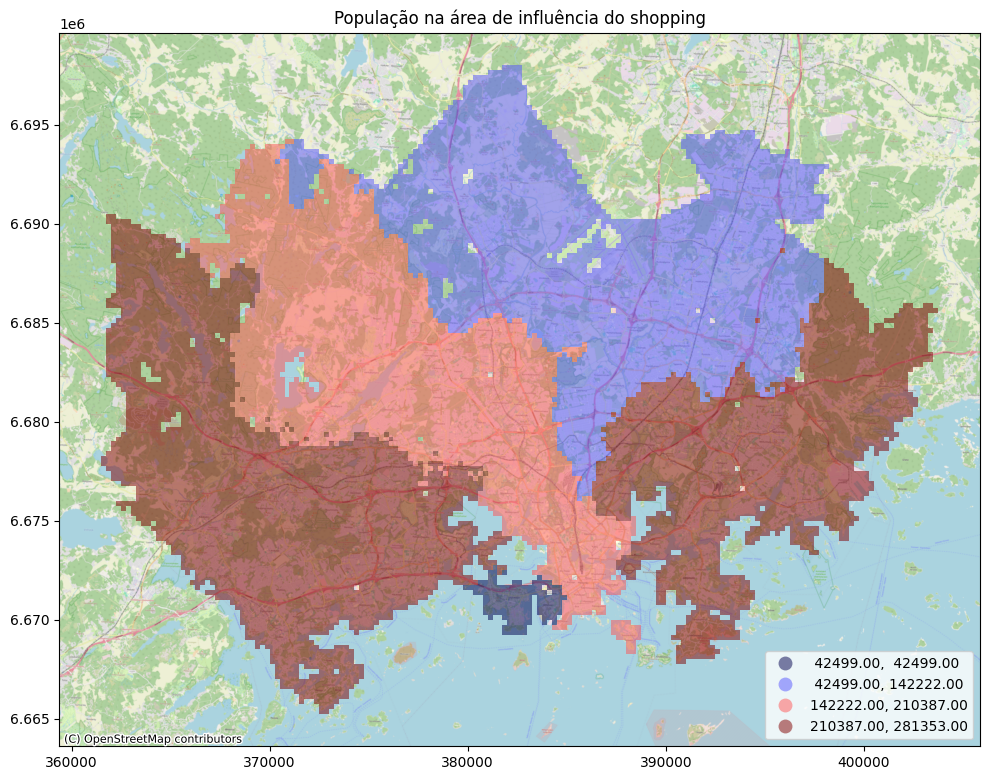

In [71]:
fig,ax=plt.subplots(figsize=(10,10))
pop_shop.plot(ax=ax, cmap='seismic', column='ASUKKAITA', scheme='natural_breaks', k=4, legend=True, alpha=0.5, legend_kwds={'loc':'lower right'})
plt.title('População na área de influência do shopping')
cx.add_basemap(ax=ax, crs=pop_shop.crs, zoom=13, source=cx.providers.OpenStreetMap.Mapnik)
plt.tight_layout()